# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from datetime import datetime, timedelta
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abuub\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
C:\Users\abuub\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
# Load .env enviroment variables
load_dotenv()
# Set current date and the date from one month ago using the ISO format
current_date = pd.Timestamp("2020-09-07", tz="America/New_York").isoformat()
past_date = pd.Timestamp("2020-08-25", tz="America/New_York").isoformat()

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient

# Set News API Key
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [4]:
# Create a newsapi client
# YOUR CODE HERE!

In [5]:
# Fetch the Bitcoin news articles
bit_articles = newsapi.get_everything(q='bitcoin',
                                      from_param='2020-08-09',
                                      to='2020-09-09',
                                      language='en',
                                      sort_by='relevancy',
                                      page=1)

In [6]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='Ethereum',
                                      from_param='2020-08-09',
                                      to='2020-09-09',
                                      language='en',
                                      sort_by='relevancy',
                                      page=1)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bit_sentiments = []

for article in bit_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bit_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bit_df = pd.DataFrame(bit_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bit_df = bit_df[cols]

bit_df.head()


,date,text,compound,positive,negative,neutral
0,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.0,1.000
1,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.0,0.937
2,2020-08-17,LONDON (Reuters) - Bitcoin jumped to its highe...,0.3818,0.069,0.0,0.931
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.0,1.000
4,2020-08-26,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.090,0.0,0.910


In [8]:
# Create the Ethereum sentiment scores DataFrame

eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()


,date,text,compound,positive,negative,neutral
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000
2,2020-08-17,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.0,1.000
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.0,0.819
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.0,1.000


In [9]:
# Describe the Bitcoin Sentiment

bit_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.0,20.000000
mean,0.455800,0.086450,0.0,0.913550
std,0.178068,0.040512,0.0,0.040512
min,0.000000,0.000000,0.0,0.802000
25%,0.507000,0.090000,0.0,0.910000
50%,0.507000,0.090000,0.0,0.910000
75%,0.507000,0.090000,0.0,0.910000
max,0.750600,0.198000,0.0,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,17.000000,17.000000,17.000000,17.000000
mean,0.181171,0.073412,0.027588,0.899059
std,0.382171,0.072722,0.057046,0.095566
min,-0.599400,0.000000,0.000000,0.732000
25%,0.000000,0.000000,0.000000,0.819000
50%,0.000000,0.062000,0.000000,0.910000
75%,0.401900,0.110000,0.000000,1.000000
max,0.817600,0.209000,0.189000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abuub\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
  
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens


In [14]:
# Create a new tokens column for Bitcoin
bit_df['tokens']=bit_df['text'].apply(tokenizer)

In [15]:
# Create a new tokens column for Ethereum
eth_df['tokens']=eth_df['text'].apply(tokenizer)

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
bit_tokens = [item for sublist in bit_df.tokens.to_list() for item in sublist]
bigram_counts = Counter(ngrams(bit_tokens, n=2))

In [18]:
# Generate the Ethereum N-grams where N=2
eth_tokens = [item for sublist in eth_df.tokens.to_list() for item in sublist]
bigram_counts = Counter(ngrams(eth_tokens, n=2))

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
token_count(bit_tokens)

[('bitcoin', 44),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('char', 20),
 ('tell', 15),
 ('robot', 14),
 ('colleague', 14),
 ('writes', 14),
 ('every', 14),
 ('fucking', 14)]

In [21]:
# Get the top 10 words for Ethereum
token_count(eth_tokens)

[('char', 17),
 ('bitcoin', 10),
 ('ethereum', 8),
 ('cryptocurrency', 5),
 ('price', 4),
 ('youve', 3),
 ('finance', 3),
 ('ha', 3),
 ('could', 3),
 ('startup', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

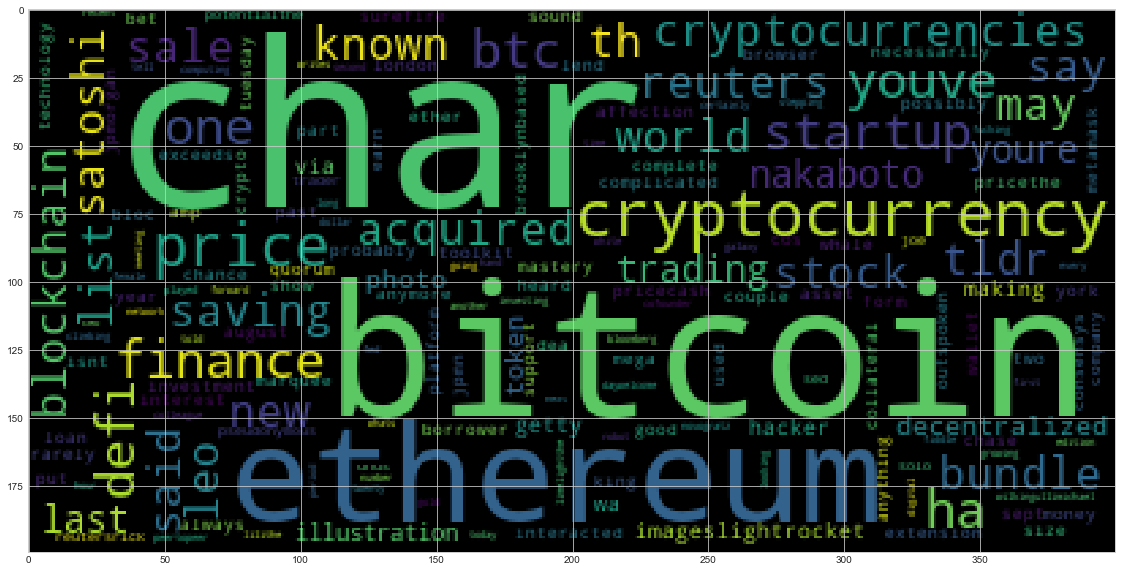

In [23]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)

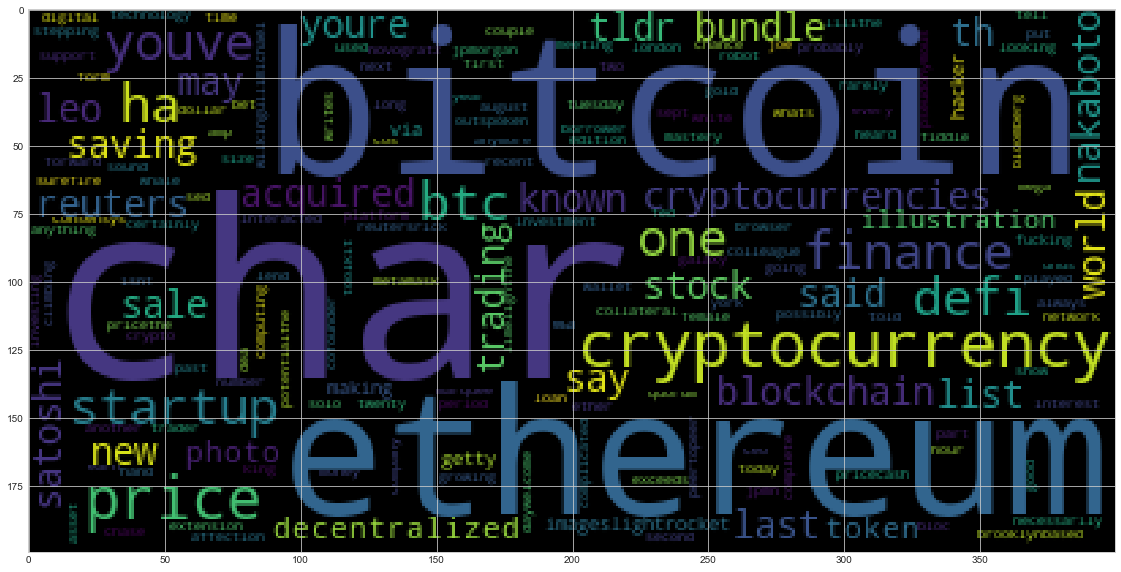

In [24]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' ' .join(eth_tokens))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
btc_text=' '.join(bit_df.text.to_list())

In [29]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)
# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin"

In [30]:
# Render the visualization
displacy.render(btc_doc,  style='ent', page=True)

In [31]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Alexis Akwagyiram PERSON
Tom Wilson PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year DATE
Nigeria GPE
South Africa GPE
Kenya GPE
VPN PRODUCT
LONDON GPE
Reuters ORG
Bitcoin GPE
over a year DATE
Monday DATE
2020 DATE
March DATE
4.4% PERCENT
LAGOS/LONDON ORG
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitc

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
eth_text=' '.join(eth_df.text.to_list())

In [33]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)
# Add a title to the document
eth_doc.user_data["title"] = " Ethereum"

In [34]:
# Render the visualization
displacy.render(eth_doc,  style='ent', page=True)

In [35]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

the past couple of years DATE
The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
29.81 MONEY
August 17 DATE
97% PERCENT
LONDON GPE
Reuters ORG
about 20% PERCENT
NEW YORK PERSON
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Rick Wilking PERSON
ul><li PERSON
Michael Novogratz PERSON
Bloomberg PERSON
up to $3,000 MONEY
The Galaxy Digital ORG
Fed ORG
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
first ORDINAL
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
twenty dollars MONEY
May DATE
bitcoin GPE
DeFi LOC
DeFi LOC
Ethereum ORG
Mateusz Slodkowski/ PERSON
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
Last week DATE
YouTube PRODUCT
Bitcoin GPE
Bitcoin GPE
one-week DATE
ul><li PERSON
Bitcoin GPE
BTC ORG
around $11,595 MONEY
20:0 CARDINAL
Monday D

---